In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(7)
#데이터 로딩, 시작36행은 건너뜀
data=np.genfromtxt("c:/data/regression/x09.txt",skip_header=36)
data[:10]
# array([[ 1., 1., 84., 46., 354.],
#        [ 2., 1., 73., 20., 190.],
#        [ 3., 1., 65., 52., 405.],
#        [ 4., 1., 70., 30., 263.],
#        [ 5., 1., 76., 57., 451.],
#        [ 7., 1., 63., 28., 288.],
#        [ 8., 1., 72., 36., 385.],
#        [ 9., 1., 79., 57., 402.],
#        [ 10., 1., 75., 44., 365.]])

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

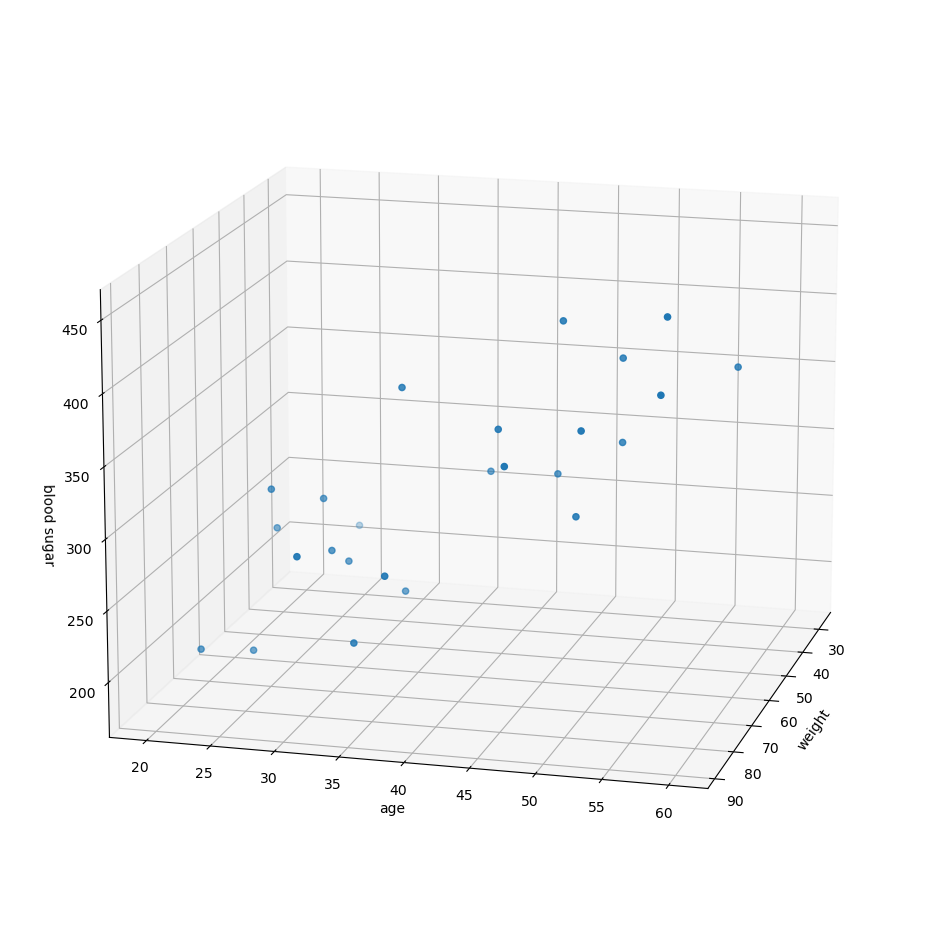

In [2]:
from mpl_toolkits.mplot3d import Axes3D
xdata=np.array(data[:,2],dtype=np.float32)
ydata=np.array(data[:,3],dtype=np.float32)
zdata=np.array(data[:,4],dtype=np.float32)
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15) #출력 각도 설정
plt.show()

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
#데이터를 케라스에 맞게 변환
#독립변수
x_data=np.array(data[:,2:4],dtype=np.float32)
#종속변수
y_data=np.array(data[:,4],dtype=np.float32)
#회귀분석 모델 생성
model=Sequential()
model.add(Dense(1,input_shape=(2,)))
#손실함수 : 인공신경망에서 학습을 통해 최적의 가중치 매개변수를 결정하기 위한 기준으로 사용하는 함수(오차를 계산하는 함수)
#최적화함수 : 오차를 줄이기 위해 weight, bias 를 수정하는 함수
#손실함수의 결과값을 가장 작게 만드는 것이 신경망 학습의 목표
#손실함수의 결과값을 작게 만들기 위해 가중치 매개변수를 조절해가는 과정이 학습 과정
#평균제곱오차(Meam Squared Error, MSE), 회귀분석에서 많이 사용하는 손실함수
# https://keras.io/ko/optimizers/ 옵티마이저 참조
rmsprop=RMSprop(learning_rate=0.01) #학습률 0.01
model.compile(loss='mse',optimizer=rmsprop)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


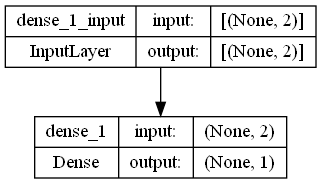

In [13]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [4]:
hist=model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 117617.3828
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 115276.1797
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 113601.2812
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 112212.7969
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 110990.4219
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 109878.4062
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 108845.7188
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 107873.0781
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 106947.6016
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 106060.1797
Epoch 11/1000
1/1 [==============================] - 0s 6ms/step - loss: 105204.1172
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 10

In [5]:
print(hist.history.keys())

dict_keys(['loss'])


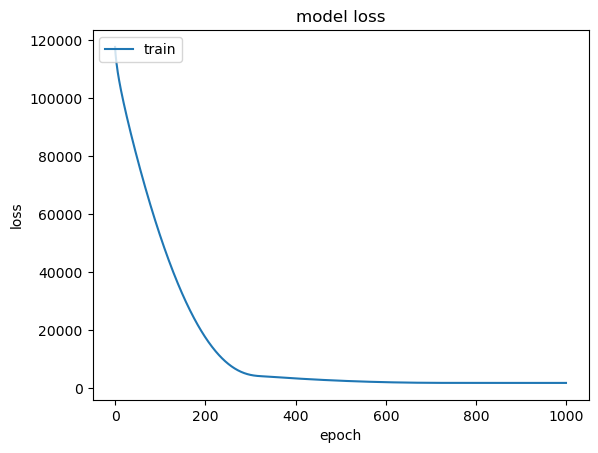

In [6]:
plt.plot(hist.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"],loc="upper left")
plt.show()

In [7]:
#새로운 데이터로 예측
#체중 100kg, 40세
#1차원 배열을 1행 2열의 2차원 배열로 변환
model.predict(np.array([100,40]).reshape(1,2))

1/1 [==============================] - 0s 68ms/step


array([[350.5004]], dtype=float32)

In [8]:
#체중 60kg, 25세
model.predict(np.array([60,25]).reshape(1,2))

1/1 [==============================] - 0s 18ms/step


array([[219.61453]], dtype=float32)

In [9]:
#회귀선을 그리기 위한 작업
#가중치와 절편,편향(bias)
w, b =model.get_weights()
w, b

(array([[1.1934243],
        [5.5432596]], dtype=float32),
 array([9.427582], dtype=float32))

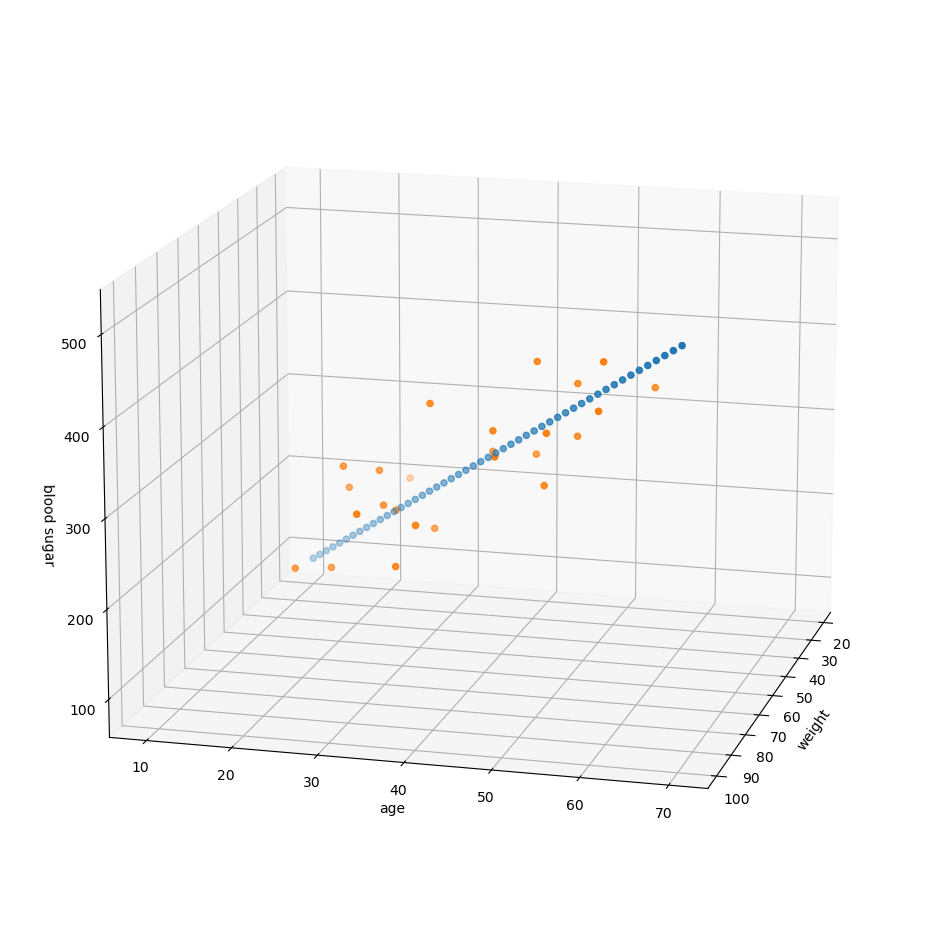

In [10]:
# linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수
x=np.linspace(20,100,50).reshape(50,1)
y=np.linspace(10,70,50).reshape(50,1)
x2=np.concatenate((x,y),axis=1) #x,y연결
#행렬곱셈
z=np.matmul(x2,w)+b
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection='3d')
#회귀선
ax.scatter(x,y,z)
#산점도
ax.scatter(xdata,ydata,zdata)
ax.set_xlabel("weight")
ax.set_ylabel("age")
ax.set_zlabel("blood sugar")
ax.view_init(15,15)
plt.show()